In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required libaries

In [ ]:
import pandas as pd 
import numpy as np
import math

Loading train and test data

In [ ]:
train_df = pd.read_csv("/content/drive/Shareddrives/kdd dataset/binaryTraget_df.csv")
test_df=pd.read_csv("/content/drive/Shareddrives/kdd dataset/processed_test_df.csv")

In [ ]:
X_train=train_df.loc[:,train_df.columns!='target']
y_train=train_df['target']
X_test=test_df.loc[:,test_df.columns!='target']
y_test=test_df['target']

Training model using isolation forest technique

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
isolation_forest=IsolationForest(random_state=42,contamination='auto',max_samples='auto')

In [ ]:
isolation_forest.fit(X_train,y_train)

IsolationForest(random_state=42)

Model predictions for test dataset

In [ ]:
preds=isolation_forest.fit_predict(X_test)

In [ ]:
test_df['preds']=preds

In [ ]:
test_df['preds'].value_counts()

 1    22122
-1      422
Name: preds, dtype: int64

In [ ]:
test_df['preds']=test_df['preds'].replace(-1,0)

In [ ]:
test_df['preds'].value_counts()

1    22122
0      422
Name: preds, dtype: int64

In [ ]:
test_df['match']=(y_test==test_df['preds'])
print(test_df['match'].mean())

0.5507008516678495


Confusion Matrix for evaluting isolation forest

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

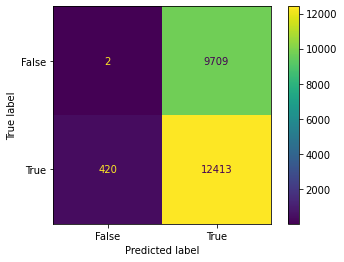

In [ ]:
confusion_matrix = metrics.confusion_matrix(test_df['target'], test_df['preds'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print('precision:%3f'%metrics.precision_score(test_df['target'],test_df['preds']))

precision:0.561116


In [ ]:
print('recall:%3f'%metrics.recall_score(test_df['target'],test_df['preds']))

recall:0.967272


In [ ]:
print('accuracy:%3f'%metrics.accuracy_score(test_df['target'],test_df['preds']))

accuracy:0.550701


In [ ]:
new_attacks_df= pd.read_csv("/content/drive/Shareddrives/kdd dataset/new_attack_list.csv")

In [ ]:
test_df['new_attacks']=new_attacks_df

In [ ]:
test_df['new_attacks'].value_counts()

-1    18794
 1     3750
Name: new_attacks, dtype: int64

In [ ]:
new_attacks_detected=(test_df['match']==test_df['new_attacks'])

In [ ]:
print("% of new attacks detected :",sum(new_attacks_detected)/3750)

% of new attacks detected : 0.9234666666666667
